In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy
import pandas
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

LoanDF = pandas.read_csv('../Loan_Rejected.csv')
# 轉成float, 移除字串中的%
LoanDF['Debt-To-Income Ratio'] = LoanDF['Debt-To-Income Ratio'].str.strip('%').astype('float32')
# 將數字轉化為百分比型式
LoanDF['Debt-To-Income Ratio'] = LoanDF['Debt-To-Income Ratio'] / 100
Y = LoanDF['Risk_Score'].astype(str)
X = LoanDF.drop(['Employment Length', 'Risk_Score'], axis=1)
LoanDF['Risk_Score'].nunique()

Using TensorFlow backend.


692

In [2]:
def encode_features(df):
    features = ['Application Date', 'Loan Title', 'State']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature]) # Transform Categories Into Integers
        print(df[feature].shape)
    return df


# feature
X = encode_features(X)
print(X.shape)

(8805449,)
(8805449,)
(8805449,)
(8805449, 5)


In [3]:
# label做encoding 產生出692個獨特的類別
Y = pandas.get_dummies(data=Y, columns=["Risk_Score"])
Y.head(5)

,0,300,301,302,303,304,305,306,307,308,...,981,982,983,984,985,986,987,988,989,990
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# deep learning要將dataframe轉成ndarray
X = X.values
Y = Y.values

In [5]:
# 標準化
minMaxScale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = minMaxScale.fit_transform(X)

In [6]:
# 切割訓練集與測試集
# 將資料分成訓練組及測試組
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [7]:
# 建立模型
model = Sequential()
model.add(Dense(5, input_dim=5, kernel_initializer='uniform', activation='relu'))
model.add(Dense(692, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=20, batch_size=5000, verbose=2)

Train on 5547432 samples, validate on 616382 samples
Epoch 1/30
 - 28s - loss: 0.1542 - acc: 0.9979 - val_loss: 0.0173 - val_acc: 0.9986
Epoch 2/30
 - 26s - loss: 0.0134 - acc: 0.9986 - val_loss: 0.0116 - val_acc: 0.9986
Epoch 3/30
 - 26s - loss: 0.0111 - acc: 0.9986 - val_loss: 0.0108 - val_acc: 0.9986
Epoch 4/30
 - 26s - loss: 0.0106 - acc: 0.9986 - val_loss: 0.0104 - val_acc: 0.9986
Epoch 5/30
 - 26s - loss: 0.0103 - acc: 0.9986 - val_loss: 0.0102 - val_acc: 0.9986
Epoch 6/30
 - 26s - loss: 0.0101 - acc: 0.9986 - val_loss: 0.0100 - val_acc: 0.9986
Epoch 7/30
 - 26s - loss: 0.0099 - acc: 0.9986 - val_loss: 0.0098 - val_acc: 0.9986
Epoch 8/30
 - 27s - loss: 0.0097 - acc: 0.9986 - val_loss: 0.0096 - val_acc: 0.9986
Epoch 9/30
 - 27s - loss: 0.0095 - acc: 0.9986 - val_loss: 0.0095 - val_acc: 0.9986
Epoch 10/30
 - 26s - loss: 0.0095 - acc: 0.9986 - val_loss: 0.0094 - val_acc: 0.9986
Epoch 11/30
 - 26s - loss: 0.0094 - acc: 0.9986 - val_loss: 0.0094 - val_acc: 0.9986
Epoch 12/30
 - 26s - 

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

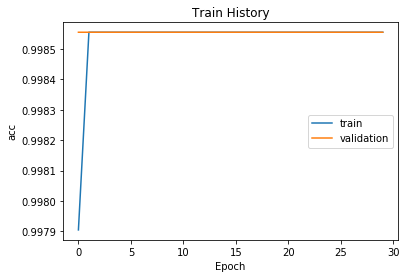

In [14]:
show_train_history(train_history, 'acc', 'val_acc')

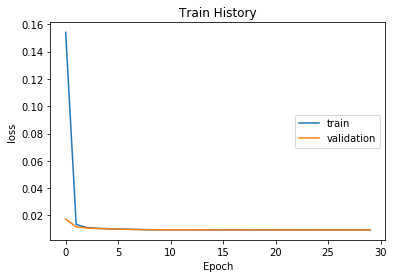

In [15]:
show_train_history(train_history, 'loss', 'val_loss')

In [11]:
scores = model.evaluate(x=X_test, y=y_test)
scores[1]

2641635/2641635 [==============================] - 61s 23us/step


0.9985548848408414